# Bike Demand Prediction

## Data Exploration

### Feature extraction and engineering

The description of the data features from the Kaggle websites(https://www.kaggle.com/c/bike-sharing-demand/data):
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [2]:
#Reading the training dataset
train_data = pd.read_csv("./data/train.csv")

In [3]:
#Checking for missing value
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
print("There are total {} datasets.".format(train_data.shape[0]))

There are total 10886 datasets.


In [5]:
train_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Since the data is recorded in hourly basis, the "datetime" can be splited to "date" and "hour". We can also derive other useful features such as "weekday", "month","year", "day".

In [7]:
# derive new features out of "datetime"

# derive date and hour from datetime
train_data['datetime'] = pd.to_datetime(train_data['datetime'], format='%Y%m%d %H:%M:%S')
train_data['date'] = train_data.datetime.dt.date
train_data['hour'] = train_data.datetime.dt.hour
train_data['weekday'] = train_data.datetime.dt.weekday
train_data['year'] = train_data.datetime.dt.year
train_data['month'] = train_data.datetime.dt.month
train_data['day'] = train_data.datetime.dt.day

train_data[['datetime','date','hour','year','month','day','weekday']].head()

,datetime,date,hour,year,month,day,weekday
0,2011-01-01 00:00:00,2011-01-01,0,2011,1,1,5
1,2011-01-01 01:00:00,2011-01-01,1,2011,1,1,5
2,2011-01-01 02:00:00,2011-01-01,2,2011,1,1,5
3,2011-01-01 03:00:00,2011-01-01,3,2011,1,1,5
4,2011-01-01 04:00:00,2011-01-01,4,2011,1,1,5


Note: The day of the week with Monday=0, Sunday=6. The month as January=1, December=12.

In [8]:
train_data['season_d'] = train_data.season.map({1: "Spring", \
                                                2 : "Summer", \
                                                3 : "Fall", \
                                                4 :"Winter" })
train_data['weather_d'] = train_data.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
train_data["weekday_d"] = train_data.weekday.map({0: "Monday", \
                                                 1: "Tuesday", \
                                                 2: "Wednesday", \
                                                 3: "Thursday", \
                                                 4: "Friday", \
                                                 5: "Saturday", \
                                                 6: "Sunday"})
train_data["month_d"] = train_data.month.map({1: "Jan", \
                                             2: "Feb", \
                                             3: "Mar", \
                                             4: "Apr", \
                                             5: "May", \
                                             6: "Jun",\
                                             7: "Jul", \
                                             8: "Aug", \
                                             9: "Sep", \
                                             10: "Oct", \
                                             11: "Nov", \
                                             12: "Dec"})

In [9]:
# all the features in the dataframe
train_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'hour', 'weekday', 'year', 'month', 'day', 'season_d',
       'weather_d', 'weekday_d', 'month_d'],
      dtype='object')

### Data Visualization

(array([734107., 734197., 734289., 734381., 734472., 734563., 734655.,
        734747., 734838.]), <a list of 9 Text xticklabel objects>)

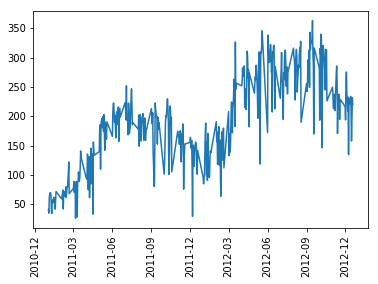

In [10]:
# Plotting the daily demand over the time
monthSeries = pd.DataFrame(train_data.groupby("date")["count"].mean()).reset_index()
monthData = monthSeries.sort_values(by=["date"],ascending=True)
plt.plot(monthSeries["date"],monthSeries['count'])
plt.xticks(rotation=90)

It appears that there are higher demand around June to August, while a lower demand around December to February. Overall, the counts are higher in year 2012 than 2011, suggesting that there is a growth in bike sharing business.

In [11]:
# checking... 
# if there are working days on holidays
# if there are working days on weekends (Saturdays and Sunday, denoted by 5 and 6, respectively)
train_data['n'] = 0
train_data.groupby(['weekday','holiday','workingday']).n.count()

weekday  holiday  workingday
0        0        1             1312
         1        0              239
1        0        1             1539
2        0        1             1527
         1        0               24
3        0        1             1553
4        0        1             1481
         1        0               48
5        0        0             1584
6        0        0             1579
Name: n, dtype: int64

From above statistics, Saturdays (5) and Sundays (6) are considered as neither holiday nor working day.

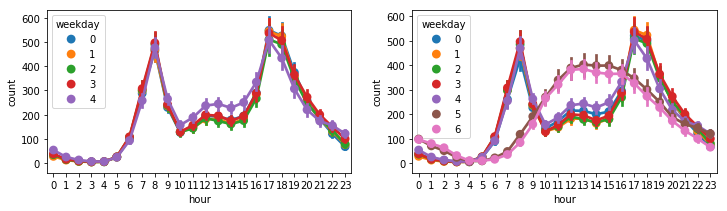

In [12]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12, 3)

working_day_data = train_data[train_data['workingday'] == 1]
sns.pointplot(data=working_day_data,y="count",x='hour',hue="weekday",ax=axes[0])
sns.pointplot(data=train_data,y="count",x='hour',hue="weekday",ax=axes[1])

It appears that the weeda

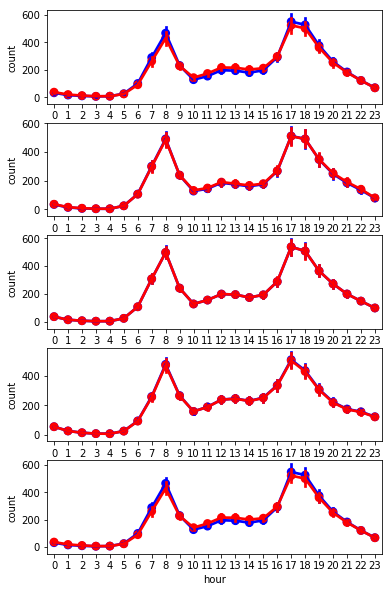

In [13]:
fig, axes = plt.subplots(nrows=5,ncols=1)
fig.set_size_inches(6, 10)

sns.pointplot(data=working_day_data[working_day_data['weekday'].isin([0])],y="count",x='hour',color='b',ax=axes[0])
sns.pointplot(data=train_data[train_data['weekday'].isin([0])],y="count",x='hour',color='r',ax=axes[0])

sns.pointplot(data=working_day_data[working_day_data['weekday'].isin([2])],y="count",x='hour',color='b',ax=axes[1])
sns.pointplot(data=train_data[train_data['weekday'].isin([2])],y="count",x='hour',color='r',ax=axes[1])

sns.pointplot(data=working_day_data[working_day_data['weekday'].isin([3])],y="count",x='hour',color='b',ax=axes[2])
sns.pointplot(data=train_data[train_data['weekday'].isin([3])],y="count",x='hour',color='r',ax=axes[2])

sns.pointplot(data=working_day_data[working_day_data['weekday'].isin([4])],y="count",x='hour',color='b',ax=axes[3])
sns.pointplot(data=train_data[train_data['weekday'].isin([4])],y="count",x='hour',color='r',ax=axes[3])

sns.pointplot(data=working_day_data[working_day_data['weekday'].isin([0])],y="count",x='hour',color='b',ax=axes[4])
sns.pointplot(data=train_data[train_data['weekday'].isin([0])],y="count",x='hour',color='r',ax=axes[4])

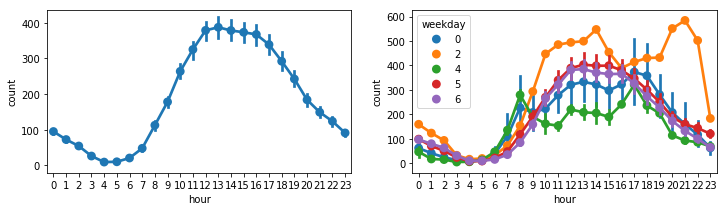

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12, 3)

non_working_day_data = train_data[train_data['workingday'] == 0]
sns.pointplot(data=non_working_day_data,y="count",x='hour', ax = axes[0])
sns.pointplot(data=non_working_day_data,y="count",x='hour',hue='weekday', ax = axes[1])

In [15]:
print(non_working_day_data[non_working_day_data['weekday']== 2].date.unique())

[datetime.date(2012, 7, 4)]


In [16]:
non_working_day_data[non_working_day_data['weekday'] < 5].date.unique()

array([datetime.date(2011, 1, 17), datetime.date(2011, 4, 15),
       datetime.date(2011, 7, 4), datetime.date(2011, 9, 5),
       datetime.date(2011, 10, 10), datetime.date(2011, 11, 11),
       datetime.date(2012, 1, 2), datetime.date(2012, 1, 16),
       datetime.date(2012, 4, 16), datetime.date(2012, 7, 4),
       datetime.date(2012, 9, 3), datetime.date(2012, 10, 8),
       datetime.date(2012, 11, 12)], dtype=object)

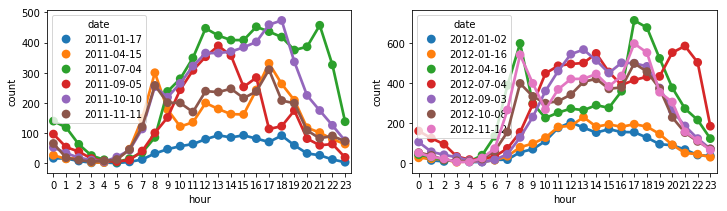

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12, 3)

sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] < 5)& (non_working_day_data['year'] == 2011)],
              y="count",
              x='hour',
              hue='date',
             ax = axes[0])
sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] < 5) \
                                        & (non_working_day_data['year'] == 2012)],
              y="count",
              x='hour',
              hue='date',
             ax = axes[1])

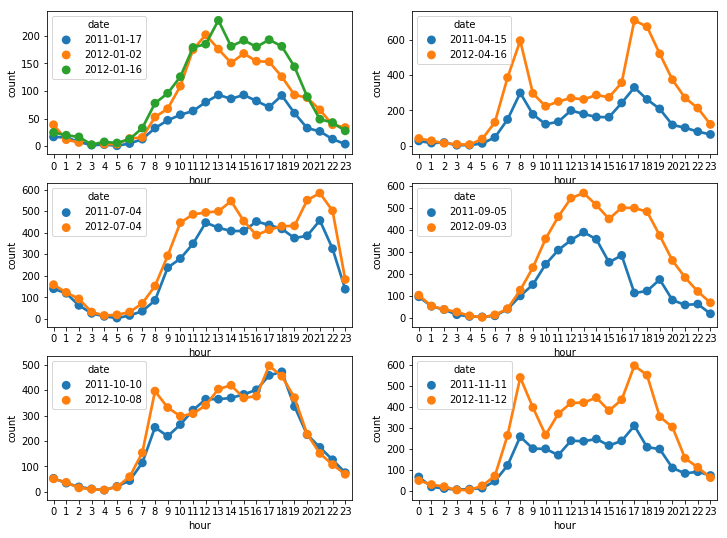

In [18]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 9)

sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] < 5) \
                                        & (non_working_day_data['month'] == 1)],
              y="count",
              x='hour',
              hue='date',
             ax = axes[0][0])
sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] < 5) \
                                        & (non_working_day_data['month'] == 4)],
              y="count",
              x='hour',
              hue='date',
             ax = axes[0][1])
sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] < 5) \
                                        & (non_working_day_data['month'] == 7)],
              y="count",
              x='hour',
              hue='date',
             ax = axes[1][0])
sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] < 5) \
                                        & (non_working_day_data['month'] == 9)],
              y="count",
              x='hour',
              hue='date',
             ax = axes[1][1])
sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] < 5) \
                                        & (non_working_day_data['month'] == 10)],
              y="count",
              x='hour',
              hue='date',
             ax = axes[2][0])
sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] < 5) \
                                        & (non_working_day_data['month'] == 11)],
              y="count",
              x='hour',
              hue='date',
             ax = axes[2][1])

Here is a list of holiday of Washington D.C. (2011-2012):
* Friday, December 31, 2010  New Year's Day  
* Monday, January 17, 2011  Martin Luther King Jr. Day
* Monday, February 21, 2011  Washington's Birthday
* Friday, April 15, 2011  DC Emancipation Day
* Monday, May 30, 2011  Memorial Day
* Monday, July 4, 2011  Independence Day
* Monday, September 5, 2011  Labor Day
* Monday, October 10, 2011  Columbus Day
* Friday, November 11, 2011  Veterans Day
* Thursday, November 24, 2011  Thanksgiving Day
* Monday, December 26, 2011  Christmas Day
* Monday, January 2, 2012  New Year's Day  
* Monday, January 16, 2012  Martin Luther King Jr. Day
* Monday, February 20, 2012  Washington's Birthday
* Monday, April 16, 2012  DC Emancipation Day
* Monday, May 28, 2012  Memorial Day
* Wednesday, July 4, 2012  Independence Day
* Monday, September 3, 2012  Labor Day
* Monday, October 8, 2012  Columbus Day
* Monday, November 12, 2012  Veterans Day
* Thursday, November 22, 2012  Thanksgiving Day
* Tuesday, December 25, 2012  Christmas Day


It is notable that on April 15-16 (DC Emancipation Day), October 8-10(Columbus Day), and November 11-12 (Veterans Day),there are two slight peaks around 7-8 and 17-18 hours, similar to the count in normal working day. This might suggest that these three holidays might not be heavily celebrated by everyone, some businesses (restaurants, retail shops, etc) might operate as usual and some employees might have to work.

It should be noted that on National Day(July 4th), the bike rental has high demand over a wider time period (9am -10pm hour) as compared to weekends(11am-5pm) and other holidays(9am-7pm )

On average, the counts are higher in year 2012 than 2011, suggesting that there is a growth in bike sharing business.

[(-10, 650), <matplotlib.text.Text at 0x10e90d748>]

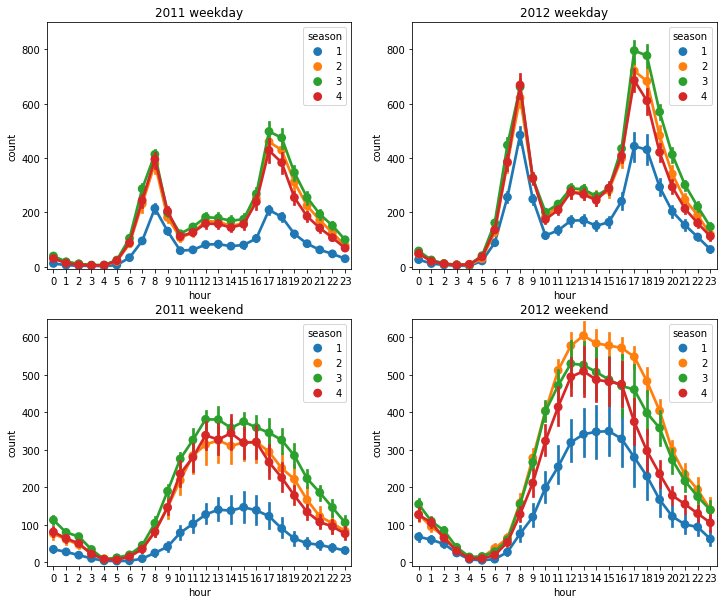

In [19]:
# Excluding the holiday, plotting the hourly bike count against different seasons
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

sns.pointplot(data=working_day_data[(working_day_data['year'] == 2011)],
              y="count",
              x='hour',
              hue='season',
              ax = axes[0][0])
sns.pointplot(data=working_day_data[(working_day_data['year'] == 2012)],
              y="count",
              x='hour',
              hue='season',
              ax = axes[0][1])
sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] >= 5) \
                                        & (non_working_day_data['year'] == 2011)],
              y="count",
              x='hour',
              hue='season',
              ax = axes[1][0])
sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] >= 5) \
                                        & (non_working_day_data['year'] == 2012)],
              y="count",
              x='hour',
              hue='season',
              ax = axes[1][1])
axes[0][0].set(ylim=(-10,900),title="2011 weekday")
axes[0][1].set(ylim=(-10,900),title="2012 weekday")
axes[1][0].set(ylim=(-10,650),title="2011 weekend")
axes[1][1].set(ylim=(-10,650),title="2012 weekend")

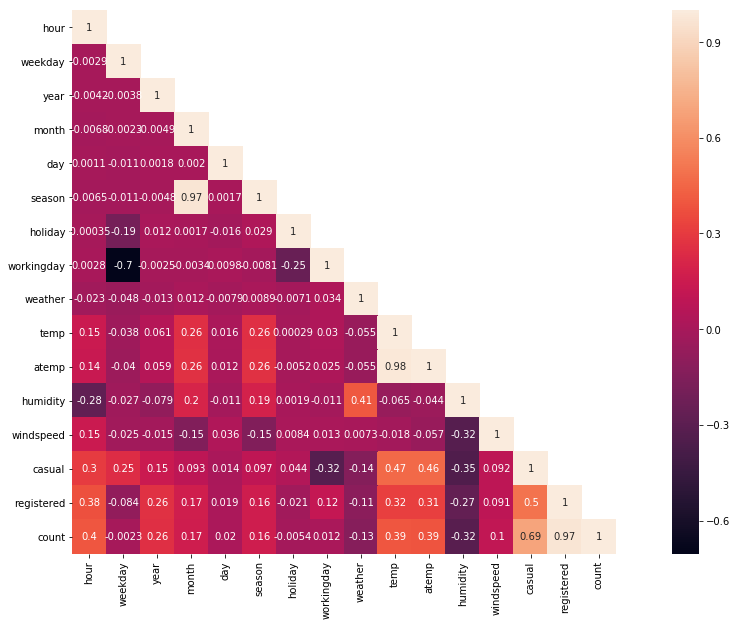

In [20]:
#calculating the correlation between features and count
corrMatt = train_data[['hour', 'weekday', 'year', 'month', 'day','season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=1., square=True,annot=True)

[<matplotlib.text.Text at 0x10fe86d68>, None]

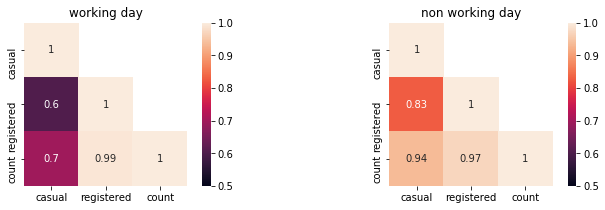

In [21]:
corrMatt1 = working_day_data[['casual', 'registered', 'count']].corr()
corrMatt2 = non_working_day_data[['casual', 'registered', 'count']].corr()

mask1 = np.array(corrMatt1)
mask2 = np.array(corrMatt2)

mask1[np.tril_indices_from(mask1)] = False
mask2[np.tril_indices_from(mask2)] = False

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12, 3)

sns.heatmap(corrMatt1, mask=mask1,vmax=1., vmin=0.5, square=True,annot=True,ax=axes[0])
sns.heatmap(corrMatt2, mask=mask2,vmax=1., vmin=0.5, square=True,annot=True,ax=axes[1])

axes[0].set(title="working day",label='big')
axes[1].set(title="non working day",label='big')

/Users/chinxinyu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


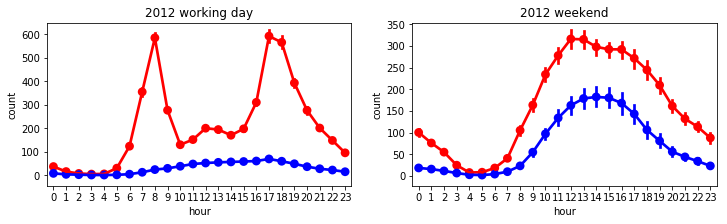

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12, 3)

sns.pointplot(data=working_day_data[(working_day_data['year'] == 2012)],
              y="registered",
              x='hour',
              color='r',
              ax = axes[0],
              label="registered")
sns.pointplot(data=working_day_data[(working_day_data['year'] == 2012)],
              y="casual",
              x='hour',
              color='b',
              ax = axes[0],
              label="casual")

sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] >= 5) \
                                        & (non_working_day_data['year'] == 2012)],
              y="registered",
              x='hour',
              color='r',
              ax = axes[1],
              label="registered")
sns.pointplot(data=non_working_day_data[(non_working_day_data['weekday'] >= 5) \
                                        & (non_working_day_data['year'] == 2012)],
              y="casual",
              x='hour',
              color='b',
              ax = axes[1],
              label="casual")

axes[0].set(title="2012 working day",label='big',ylabel='count')
axes[0].legend()
axes[1].set(title="2012 weekend",label='big',ylabel='count')
axes[1].legend()

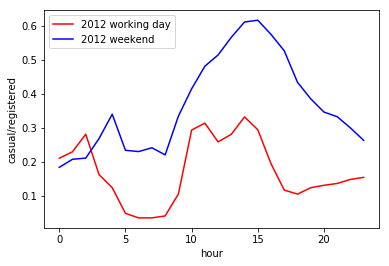

In [23]:
data1 = pd.DataFrame(working_day_data[(working_day_data['year'] == 2012)].groupby("hour")["registered"].mean()).reset_index()
data1['casual']=working_day_data[(working_day_data['year'] == 2012)].groupby("hour")["casual"].mean()
data1['ratio']=data1["casual"]/data1['registered']

data2 = pd.DataFrame(non_working_day_data[(non_working_day_data['weekday'] >= 5) \
                                        & (non_working_day_data['year'] == 2012)].groupby("hour")["registered"].mean()).reset_index()
data2['casual']=non_working_day_data[(non_working_day_data['weekday'] >= 5) \
                                        & (non_working_day_data['year'] == 2012)].groupby("hour")["casual"].mean()
data2['ratio']=data2["casual"]/data2['registered']

plt.plot(data1["hour"],data1['ratio'],color='r',label='2012 working day')
plt.plot(data2["hour"],data2['ratio'],color='b',label='2012 weekend')
plt.legend()
plt.xlabel('hour')
plt.ylabel('casual/registered')

### Outlier Analysis

 None]

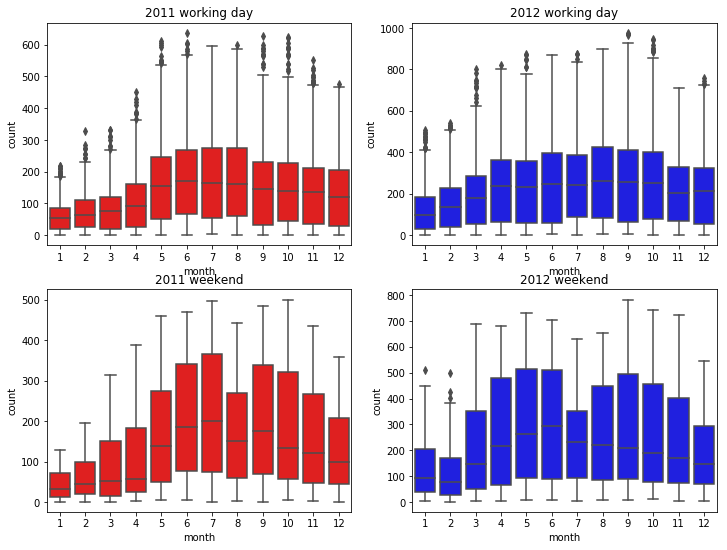

In [24]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 9)

sns.boxplot(data=working_day_data[(working_day_data['year'] == 2011)],
              y="count",
              x='month',
              ax = axes[0][0],
             color='r')
sns.boxplot(data=working_day_data[(working_day_data['year'] == 2012)],
              y="count",
              x='month',
              ax = axes[0][1],
             color='b')
sns.boxplot(data=non_working_day_data[(non_working_day_data['weekday'] >= 5) \
                                        & (non_working_day_data['year'] == 2011)],
              y="count",
              x='month',
              ax = axes[1][0],
             color='r')
sns.boxplot(data=non_working_day_data[(non_working_day_data['weekday'] >= 5) \
                                        & (non_working_day_data['year'] == 2012)],
              y="count",
              x='month',
              ax = axes[1][1],
             color='b')
axes[0][0].set(title="2011 working day",label='big',ylabel='count')
axes[0][1].set(title="2012 working day",label='big',ylabel='count')
axes[1][0].set(title="2011 weekend",label='big',ylabel='count')
axes[1][1].set(title="2012 weekend",label='big',ylabel='count')

 None]

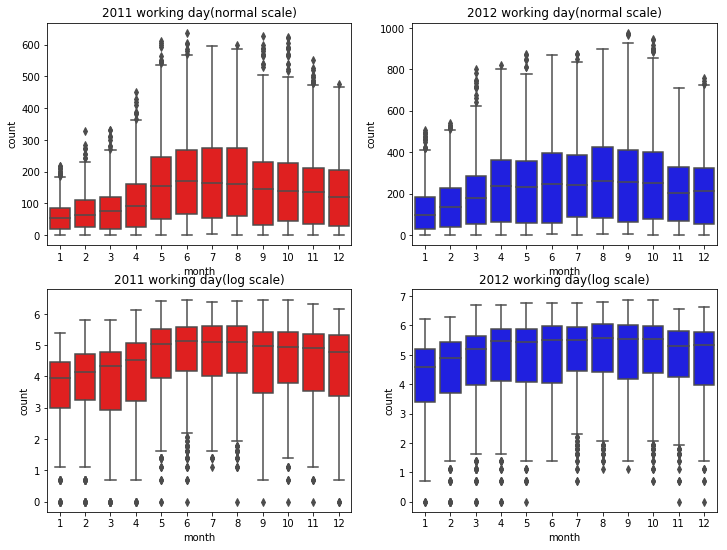

In [25]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 9)

sns.boxplot(data=working_day_data[(working_day_data['year'] == 2011)],
              y="count",
              x='month',
              ax = axes[0][0],
             color='r')
sns.boxplot(data=working_day_data[(working_day_data['year'] == 2012)],
              y="count",
              x='month',
              ax = axes[0][1],
             color='b')
sns.boxplot(y=np.log(working_day_data[(working_day_data['year'] == 2011)]["count"]),
              x=working_day_data[(working_day_data['year'] == 2011)]['month'],
              ax = axes[1][0],
             color='r')
sns.boxplot(y=np.log(working_day_data[(working_day_data['year'] == 2012)]["count"]),
              x=working_day_data[(working_day_data['year'] == 2012)]['month'],
              ax = axes[1][1],
             color='b')

axes[0][0].set(title="2011 working day(normal scale)",label='big',ylabel='count')
axes[0][1].set(title="2012 working day(normal scale)",label='big',ylabel='count')
axes[1][0].set(title="2011 working day(log scale)",label='big',ylabel='count')
axes[1][1].set(title="2012 working day(log scale)",label='big',ylabel='count')

In [26]:
train_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'hour', 'weekday', 'year', 'month', 'day', 'season_d',
       'weather_d', 'weekday_d', 'month_d', 'n'],
      dtype='object')

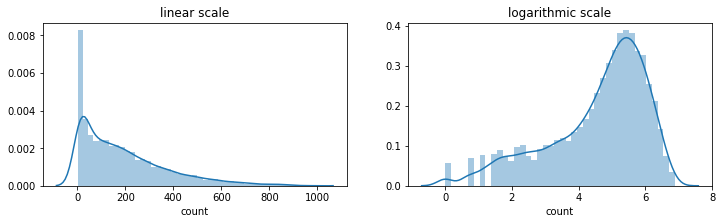

In [27]:
fig,axes = plt.subplots(ncols=2,nrows=1)
fig.set_size_inches(12, 3)

sns.distplot(train_data["count"],ax=axes[0])
sns.distplot(np.log(train_data["count"]),ax=axes[1])
axes[0].set(title='linear scale')
axes[1].set(title='logarithmic scale')

## Machine Learning Model Analysis

### RMSLE Scorer

In [28]:
def rmsle(y, y1,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y1 = np.exp(y1)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y1]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [29]:
def feature_plot(importances, X_train, y_train, n_features):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:n_features]]
    values = importances[indices][:n_features]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(n_features), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(n_features) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(n_features), columns)
    plt.xlim((-0.5, n_features-0.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show() 

### Train, Test, and Validation dataset

In [30]:
def data_preprocess2(df):
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d %H:%M:%S')
    df['date'] = df.datetime.dt.date
    df['hour'] = df.datetime.dt.hour
    df['weekday'] = df.datetime.dt.weekday
    df['year'] = df.datetime.dt.year
    df['month'] = df.datetime.dt.month
    df['day'] = df.datetime.dt.day

    categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
    for var in categoricalFeatureNames:
        df[var] = df[var].astype("category")
    
    df=df.drop(['datetime','atemp','season','date'], axis=1)

    return df

In [31]:
train_set = pd.read_csv("./data/train.csv")
test_set = pd.read_csv("./data/test.csv")
datetime_col = test_set['datetime']

In [32]:
train_set = data_preprocess2(train_set)
test_set = data_preprocess2(test_set)

In [33]:
train_set=train_set.drop(['registered','casual'], axis=1)

In [34]:
train_set.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'count', 'hour', 'weekday', 'year', 'month', 'day'],
      dtype='object')

In [35]:
y_valid = train_set[train_set['day']>=15]['count']
x_valid = train_set[train_set['day']>=15].drop(['count','day'],axis=1)

y_train = train_set[train_set['day']< 15]['count']
x_train = train_set[train_set['day']< 15].drop(['count','day'],axis=1)

x_test = test_set.drop(['day'],axis=1)

In [36]:
y = train_set['count']
x = train_set.drop(['count','day'],axis=1)

x_te = test_set.drop(['day'],axis=1)

In [37]:
y_log = np.log(y+1)

y_train_log = np.log(y_train+1)
y_valid_log = np.log(y_valid+1)

#### Random Forrest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

RF_regr = RandomForestRegressor(random_state=0)
RF_regr.fit(x_train, y_train_log)

y_train_pred = RF_regr.predict(x_train)
y_valid_pred = RF_regr.predict(x_valid)

RF_train_score = rmsle(y_train_log, y_train_pred,convertExp=True)
RF_valid_score = rmsle(y_valid_log, y_valid_pred,convertExp=True)

predsTest = RF_regr.predict(x_test)

print("Train score: {:.4f}".format(RF_train_score))
print("Valid score: {:.4f}".format(RF_valid_score))

submission = pd.DataFrame({
        "datetime": datetime_col,
        "count": [max(0, x) for x in np.rint(np.exp(predsTest)-1)]
                        })
submission = submission[['datetime','count']]
submission.to_csv('RF_default2.csv', index=False)

Train score: 0.1272
Valid score: 0.3249


The Kaggle score is 0.48294.

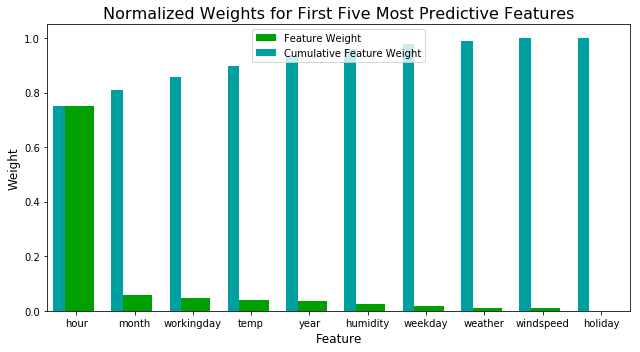

In [37]:
# Feature Importances
RF_importances_default = RF_regr.feature_importances_
feature_plot(RF_importances_default, x_train, y_train_log, 10)

In [38]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

RF_regr = RandomForestRegressor(random_state=0)
parameters = {"n_estimators":[10,20,50,100], 'min_samples_leaf':[1,2,3,5]}
scorer = make_scorer(rmsle, greater_is_better=False)
grid_obj = GridSearchCV(estimator=RF_regr, param_grid=parameters, scoring=scorer)

RF_grid_fit = grid_obj.fit(x_train, y_train_log)

# Get the estimator
best_RF = RF_grid_fit.best_estimator_

y_train_pred = best_RF.predict(x_train)
y_valid_pred = best_RF.predict(x_valid)
predsTest = best_RF.predict(x_test)

RF_train_score = rmsle(y_train_log, y_train_pred)
RF_valid_score = rmsle(y_valid_log, y_valid_pred)

print("Train score: {:.4f}".format(RF_train_score))
print("Valid score: {:.4f}".format(RF_valid_score))

submission = pd.DataFrame({
        "datetime": datetime_col,
        "count": [max(0, x) for x in np.rint(np.exp(predsTest)-1)]
                        })
submission = submission[['datetime','count']]
submission.to_csv('RF_best2.csv', index=False)

/Users/chinxinyu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/chinxinyu/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Train score: 0.1489
Valid score: 0.3065


The Kaggle score is 0.47029.

In [39]:
RF_grid_fit.best_params_

{'min_samples_leaf': 2, 'n_estimators': 100}

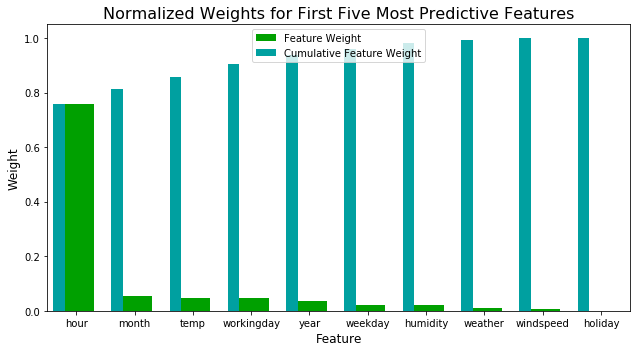

In [40]:
# Feature Importances
RF_importances_optimized = best_RF.feature_importances_
feature_plot(RF_importances_optimized, x_train, y_train_log, 10)

In [41]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

y_log = np.log(y + 1)

RF_regr = RandomForestRegressor(random_state=0)
parameters = {"n_estimators":[10,20,50,100], 'min_samples_leaf':[1,2,3,5]}
scorer = make_scorer(rmsle, greater_is_better=False)
grid_obj = GridSearchCV(estimator=RF_regr, param_grid=parameters, scoring=scorer,cv=4)

RF_grid_fit = grid_obj.fit(x, y_log)

# Get the estimator
best_RF = RF_grid_fit.best_estimator_

y_train_pred = best_RF.predict(x)
predsTest = best_RF.predict(x_test)

RF_train_score = rmsle(y_log, y_train_pred)

print("Train score: {:.4f}".format(RF_train_score))

submission = pd.DataFrame({
        "datetime": datetime_col,
        "count": [max(0, x) for x in np.rint(np.exp(predsTest)-1)]
                        })
submission = submission[['datetime','count']]
submission.to_csv('RF_best_cv2.csv', index=False)

Train score: 0.1034


In [42]:
RF_grid_fit.best_params_

{'min_samples_leaf': 1, 'n_estimators': 100}

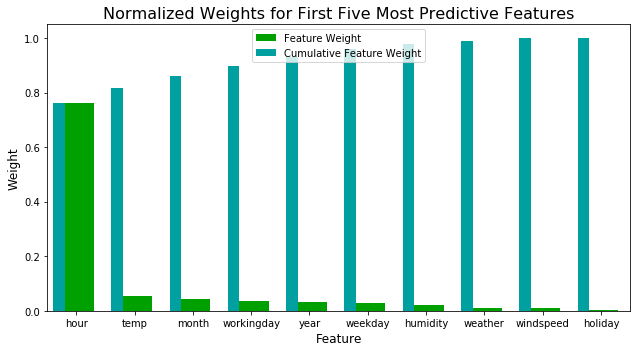

In [43]:
# Feature Importances
RF_importances_optimized2 = best_RF.feature_importances_
feature_plot(RF_importances_optimized2, x, y_log, 10)

The Kaggle score is 0.45905.

#### Gradient Boosting Regressor

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

GB_regr = GradientBoostingRegressor(random_state=0)
GB_regr.fit(x_train, y_train_log)

y_train_pred = GB_regr.predict(x_train)
y_valid_pred = GB_regr.predict(x_valid)
predsTest = GB_regr.predict(x_test)

GB_train_score = rmsle(y_train_log, y_train_pred,convertExp=True)
GB_valid_score = rmsle(y_valid_log, y_valid_pred,convertExp=True)

print("Train score: {:.4f}".format(GB_train_score))
print("Valid score: {:.4f}".format(GB_valid_score))

submission = pd.DataFrame({
        "datetime": datetime_col,
        "count": [max(0, x) for x in np.rint(np.exp(predsTest)-1)]
                        })
submission = submission[['datetime','count']]
submission.to_csv('GB_default2.csv', index=False)

Train score: 0.3515
Valid score: 0.3645


The Kaggle score is 0.4915.

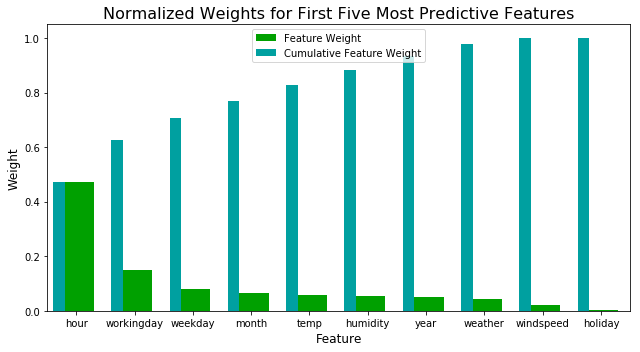

In [45]:
# Feature Importances
GB_importances_default = GB_regr.feature_importances_
feature_plot(GB_importances_default, x_train, y_train, 10)

In [46]:
GB_regr = GradientBoostingRegressor(random_state=0)

parameters = {"n_estimators":[200,500,1000,1500], 'min_samples_leaf':[1,2,3,5,8,10], 'learning_rate':[1e-3,1e-2,1e-1,1e0],'alpha':[.001,0.005,0.01,0.05,0.1,0.5,0.9]}
scorer = make_scorer(rmsle, greater_is_better=False)
grid_obj = GridSearchCV(estimator=GB_regr, param_grid=parameters, scoring=scorer)
grid_fit = grid_obj.fit(x_train, y_train_log)

# Get the estimator
best_GB = grid_fit.best_estimator_

y_train_pred = best_GB.predict(x_train)
y_valid_pred = best_GB.predict(x_valid)
predsTest = best_GB.predict(x_test)

GB_train_score = rmsle(y_train_log, y_train_pred)
GB_valid_score = rmsle(y_valid_log, y_valid_pred)

print("Train score: {:.4f}".format(GB_train_score))
print("Valid score: {:.4f}".format(GB_valid_score))

submission = pd.DataFrame({
        "datetime": datetime_col,
        "count": [max(0, x) for x in np.rint(np.exp(predsTest)-1)]
                        })
submission = submission[['datetime','count']]
submission.to_csv('GB_best2.csv', index=False)

Train score: 0.2429
Valid score: 0.2913


The Kaggle score is 0.43593.

In [47]:
grid_fit.best_params_

{'alpha': 0.001,
 'learning_rate': 0.1,
 'min_samples_leaf': 2,
 'n_estimators': 500}

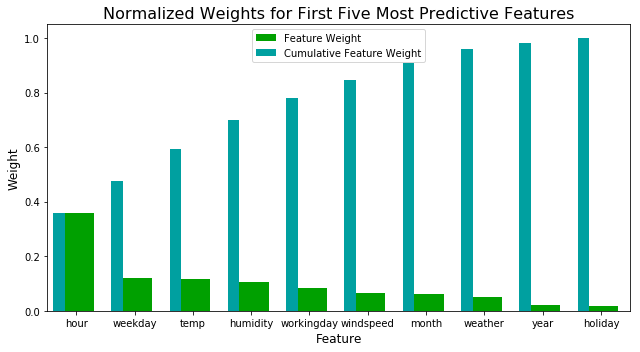

In [48]:
GB_importances_best = best_GB.feature_importances_
feature_plot(GB_importances_best, x_train, y_train, 10)

In [49]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

GB_regr = GradientBoostingRegressor()

parameters = {"n_estimators":[200,500,1000,1500], 'min_samples_leaf':[1,2,3,5], 'learning_rate':[1e-3,1e-2,1e-1,1e0],'alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.9]}
scorer = make_scorer(rmsle, greater_is_better=False)
grid_obj = GridSearchCV(estimator=GB_regr, param_grid=parameters, scoring=scorer,cv=4)
grid_fit = grid_obj.fit(x, y_log)

# Get the estimator
best_GB = grid_fit.best_estimator_

y_train_pred = best_GB.predict(x)
predsTest = best_GB.predict(x_test)

RF_train_score = rmsle(y_log, y_train_pred)

print("Train score: {:.4f}".format(GB_train_score))

submission = pd.DataFrame({
        "datetime": datetime_col,
        "count": [max(0, x) for x in np.rint(np.exp(predsTest)-1)]
                        })
submission = submission[['datetime','count']]
submission.to_csv('GB_best_cv2.csv', index=False)

Train score: 0.2429


The kaggle score is 0.42583

In [50]:
grid_fit.best_params_

{'alpha': 0.01,
 'learning_rate': 0.1,
 'min_samples_leaf': 2,
 'n_estimators': 500}

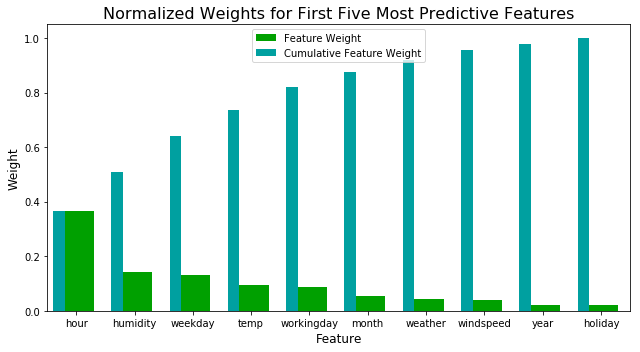

In [51]:
# Feature Importances
importances = best_GB.feature_importances_
feature_plot(importances, x, y_log, 10)

#### AdaBoost Regressor

In [38]:
from sklearn.ensemble import AdaBoostRegressor

AB_regr = AdaBoostRegressor()
AB_regr.fit(x_train, y_train_log)

y_train_pred = AB_regr.predict(x_train)
y_valid_pred = AB_regr.predict(x_valid)
predsTest = AB_regr.predict(x_test)

AB_train_score = rmsle(y_train_log, y_train_pred,convertExp=True)
AB_valid_score = rmsle(y_valid_log, y_valid_pred,convertExp=True)

print("Train score: {:.4f}".format(AB_train_score))
print("Valid score: {:.4f}".format(AB_valid_score))

submission = pd.DataFrame({
        "datetime": datetime_col,
        "count": [max(0, x) for x in np.rint(np.exp(predsTest)-1)]
                        })
submission = submission[['datetime','count']]
submission.to_csv('AB_default2.csv', index=False)

Train score: 0.6398
Valid score: 0.6459


The Kaggle score is 0.

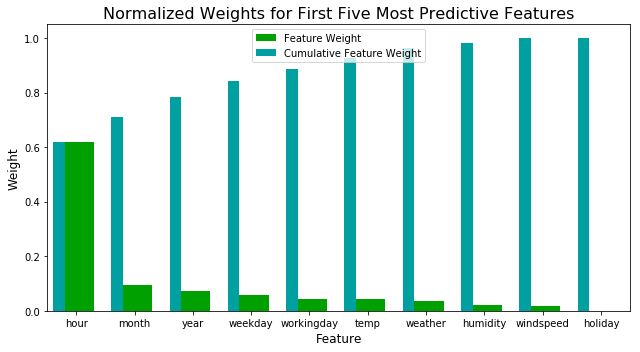

In [39]:
importances = AB_regr.feature_importances_
feature_plot(importances, x_train, y_train, 10)

In [40]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

AB_regr = AdaBoostRegressor()

parameters = {"n_estimators":[200,500,1000,1500], 'learning_rate':[1e-3,1e-2,1e-1,1e0,1e1]}
scorer = make_scorer(rmsle, greater_is_better=False)
grid_obj = GridSearchCV(estimator=AB_regr, param_grid=parameters, scoring=scorer)
grid_fit = grid_obj.fit(x_train, y_train_log)

# Get the estimator
best_AB = grid_fit.best_estimator_

y_train_pred = best_AB.predict(x_train)
y_valid_pred = best_AB.predict(x_valid)
predsTest = best_AB.predict(x_test)

AB_train_score = rmsle(y_train_log, y_train_pred)
AB_valid_score = rmsle(y_valid_log, y_valid_pred)

print("Train score: {:.4f}".format(AB_train_score))
print("Valid score: {:.4f}".format(AB_valid_score))

submission = pd.DataFrame({
        "datetime": datetime_col,
        "count": [max(0, x) for x in np.rint(np.exp(predsTest)-1)]
                        })
submission = submission[['datetime','count']]
submission.to_csv('AB_best2.csv', index=False)

/Users/chinxinyu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/chinxinyu/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Train score: 0.7080
Valid score: 0.7215


The kaggle score is 

In [41]:
grid_fit.best_params_

{'learning_rate': 1.0, 'n_estimators': 500}

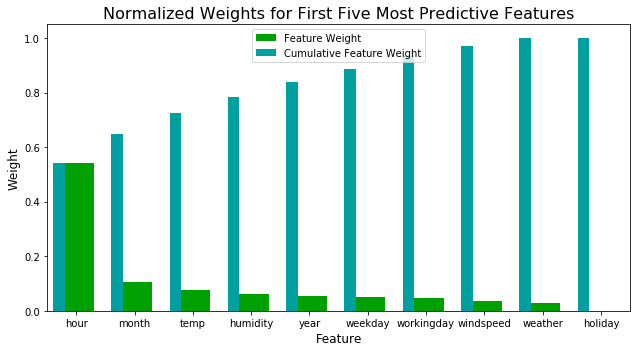

In [42]:
importances_AB = best_AB.feature_importances_
feature_plot(importances_AB, x_train, y_train, 10)

In [46]:
AB_regr = AdaBoostRegressor()

parameters = {"n_estimators":[1000,1500,2000,2500,3000,3500], 'learning_rate':[1e-3,1e-2,1e-1,1e0,2,5]}
scorer = make_scorer(rmsle, greater_is_better=False)
grid_obj = GridSearchCV(estimator=AB_regr, param_grid=parameters, scoring=scorer,cv=4)
grid_fit = grid_obj.fit(x, y_log)

# Get the estimator
best_AB = grid_fit.best_estimator_

y_train_pred = best_AB.predict(x)
predsTest = best_AB.predict(x_test)

AB_train_score = rmsle(y_log, y_train_pred)

print("Train score: {:.4f}".format(AB_train_score))
submission = pd.DataFrame({
        "datetime": datetime_col,
        "count": [max(0, x) for x in np.rint(np.exp(predsTest)-1)]
                        })
submission = submission[['datetime','count']]
submission.to_csv('AB_best_cv2.csv', index=False)

Train score: 0.6986


The Kaggle score is 

In [47]:
grid_fit.best_params_

{'learning_rate': 2, 'n_estimators': 2000}

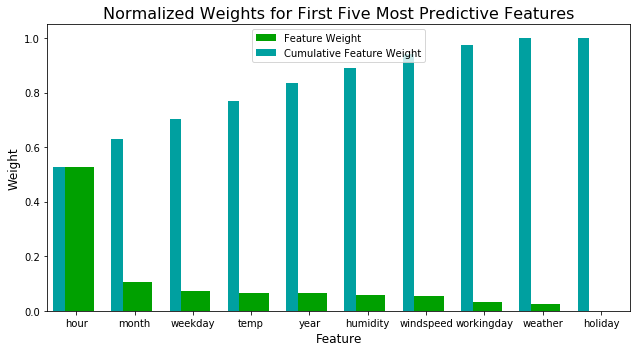

In [48]:
importances_AB = best_AB.feature_importances_
feature_plot(importances_AB, x_train, y_train, 10)